In [21]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [22]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

In [23]:
df = pd.read_csv('data/sales_data.csv')

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID
0,165079,AA Batteries (4-pack),1,3.84,03/24/19 19:17,"953 Johnson St, Boston, MA 02215",14152.0
1,289147,Macbook Pro Laptop,1,1700,11/29/19 07:25,"826 13th St, Los Angeles, CA 90001",49793.0
2,293940,AA Batteries (4-pack),1,3.84,11/28/19 12:00,"543 Main St, San Francisco, CA 94016",4748.0
3,288851,Lightning Charging Cable,1,14.95,11/02/19 18:32,"601 Maple St, Los Angeles, CA 90001",73924.0
4,239927,Apple Airpods Headphones,1,150,08/09/19 20:35,"88 Maple St, Los Angeles, CA 90001",23344.0


In [25]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID
187200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.shape

(187205, 7)

In [27]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
User ID             545
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.shape

(186660, 7)

In [30]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID
count,186660,186660,186660,186660,186660,186660,186660
unique,178438,20,10,24,142396,140788,71364
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address,User ID
freq,710,21903,168552,21903,710,710,710


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186660 entries, 0 to 186659
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186660 non-null  object
 1   Product           186660 non-null  object
 2   Quantity Ordered  186660 non-null  object
 3   Price Each        186660 non-null  object
 4   Order Date        186660 non-null  object
 5   Purchase Address  186660 non-null  object
 6   User ID           186660 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [32]:
df['Order ID'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order ID'

In [33]:
df[~df['Order ID'].str.isdigit()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID
157,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID
679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID
814,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID
897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID
1071,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID
...,...,...,...,...,...,...,...
184639,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID
185261,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID
186155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID
186565,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID


In [34]:
df = df[df['Order ID'].str.isdigit()]
df.reset_index(inplace=True, drop=True)

In [35]:
df.shape

(185950, 7)

In [36]:
names = ['Order ID', 'Quantity Ordered']
df[names] = df[names].astype(int)

In [37]:
names = ['Price Each', 'User ID']
df[names] = df[names].astype(float)

In [38]:
df['User ID'] = df['User ID'].astype(int)

In [39]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [40]:
df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
User ID                      int64
dtype: object

In [41]:
df[['Quantity Ordered', 'Price Each']].describe()

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


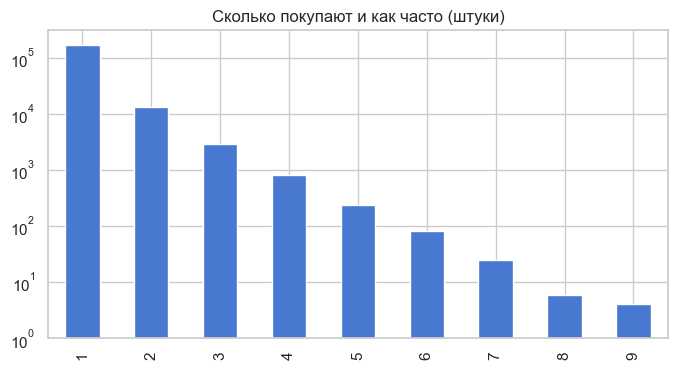

In [46]:
plt.title('Сколько покупают и как часто (штуки)')
df['Quantity Ordered'].value_counts().plot(kind = 'bar', log=True);

In [75]:
df.Product.value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [111]:
df[df['Price Each'] == df['Price Each'].max()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID,Date,GMV
1,289147,Macbook Pro Laptop,1,1700.0,2019-11-29 07:25:00,"826 13th St, Los Angeles, CA 90001",49793,2019-11-29,1700.0
9,227579,Macbook Pro Laptop,1,1700.0,2019-07-01 20:38:00,"18 Cherry St, San Francisco, CA 94016",36571,2019-07-01,1700.0
27,311116,Macbook Pro Laptop,1,1700.0,2019-12-02 09:21:00,"503 Johnson St, San Francisco, CA 94016",64037,2019-12-02,1700.0
43,142738,Macbook Pro Laptop,1,1700.0,2019-01-06 17:42:00,"171 Highland St, Seattle, WA 98101",47292,2019-01-06,1700.0
45,279542,Macbook Pro Laptop,1,1700.0,2019-11-03 07:13:00,"851 8th St, Los Angeles, CA 90001",61526,2019-11-03,1700.0
...,...,...,...,...,...,...,...,...,...
185782,280729,Macbook Pro Laptop,1,1700.0,2019-11-23 14:16:00,"714 6th St, Austin, TX 73301",65294,2019-11-23,1700.0
185802,175732,Macbook Pro Laptop,1,1700.0,2019-03-08 21:22:00,"741 Washington St, New York City, NY 10001",77927,2019-03-08,1700.0
185839,160132,Macbook Pro Laptop,1,1700.0,2019-02-11 09:35:00,"289 7th St, San Francisco, CA 94016",37246,2019-02-11,1700.0
185861,184404,Macbook Pro Laptop,1,1700.0,2019-04-07 20:13:00,"842 West St, San Francisco, CA 94016",32365,2019-04-07,1700.0


### Кейс №1: Реклама и пиар

Предположим, что перед нами стоит задача привлечения новых пользователей и удержание существующих. Для этого мы собираемся, во-первых, устраивать различные промоакции в периоды падения активности, чтобы стимулировать пользователей покупать товары, а во-вторых, запускать крупные рекламные кампании, наоборот, в период высокой активности пользователей, чтобы пользователи покупали товары именно в нашем интернет-магазине. 

__Как определить период, когда следует запускать разного рода акции?__

Обычно, в таких задачах _нету единственного правильного решения_. Вам нужно накидать возможные гипотезы и варианты, а затем обсудить минусы и плюсы каждого подхода. 

При этом нужно всегда отталкиваться от данных, которые у вас есть, и от сроков, которые вы готовы потратить на эту задачу:
- можно построить супер новороченный предсказательный алгоритм и потратить на него полгода, а можно пару часов посидеть в пандасе и уже придумать вполне себе хорошее решение

_Одно из возможных решений:_
1. Посмотреть на динамику кол-ва заказов по дням, возможно увидим сезонность.
2. Посмотреть распределение выручки от заказов по месяцам.
3. Посмотреть, в какое время суток чаще всего создают заказ.

In [47]:
import plotly
import plotly_express as px

In [174]:
df['Date'] = df['Order Date'].dt.date
df['Month'] = df['Order Date'].apply(lambda w: str(w).split(' ')[0][:-3])
df_by_day = df.groupby('Date')['Quantity Ordered'].sum()[:-1]
df_by_day.head()

Date
2019-01-01    343
2019-01-02    368
2019-01-03    330
2019-01-04    330
2019-01-05    355
Name: Quantity Ordered, dtype: int64

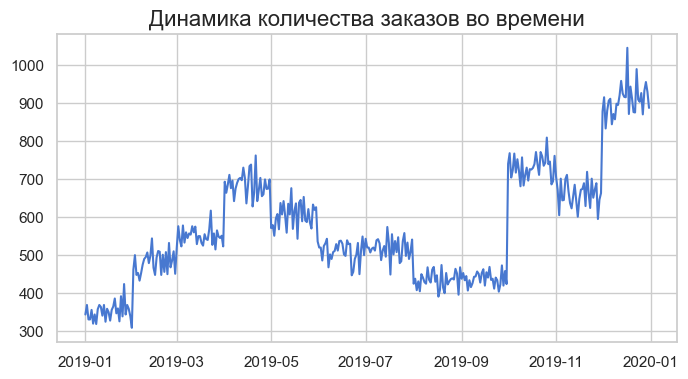

In [69]:
plt.title('Динамика количества заказов во времени', fontsize=16)
plt.plot(df_by_day);

In [73]:
px.line(
    df_by_day.reset_index(),
    x = 'Date',
    y = 'Quantity Ordered',
    title = 'Динамика количества заказов во времени'
)

In [132]:
product_set = set(df['Product'].value_counts()[:500].index.values)
product_set

{'20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone'}

In [133]:
df_by_day = (
    df[df.Product.isin(product_set)]
    .groupby(['Date','Product'])['Quantity Ordered']
    .sum()[:-4]
    .reset_index()
)

fig = px.line(
    df_by_day,
    x = 'Date',
    y = 'Quantity Ordered',
    color='Product',
    title = 'Динамика количества заказов во времени'
)

fig.update_layout()

fig.show()

In [92]:
# Можно сохранить график в статичном виде на компьютер
plotly.offline.plot(fig, filename='my_beautiful_histogram.html', show_link=False)

'my_beautiful_histogram.html'

In [94]:
df['GMV'] = df['Quantity Ordered'] * df['Price Each']

<AxesSubplot: xlabel='GMV', ylabel='Count'>

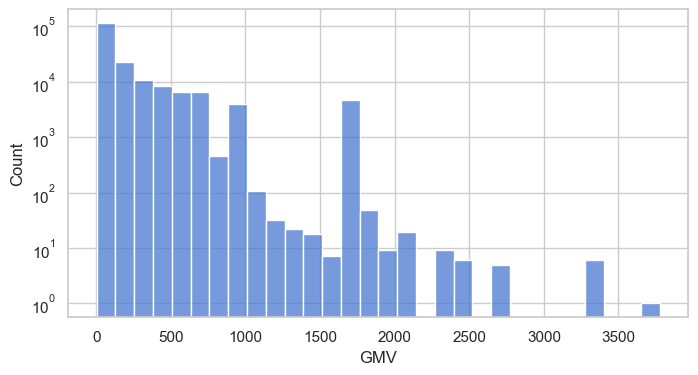

In [108]:
df_gmv = df.groupby(['Date','Order ID'])['GMV'].sum().reset_index()
df_gmv['ln_gmv'] = df['GMV'].apply(lambda w: np.log(w + 1))
sns.histplot(data=df_gmv, x='GMV', bins=30, log=True)

In [121]:
df_gmv['month'] = df_gmv.Date.apply(lambda w: str(w)[:-3])

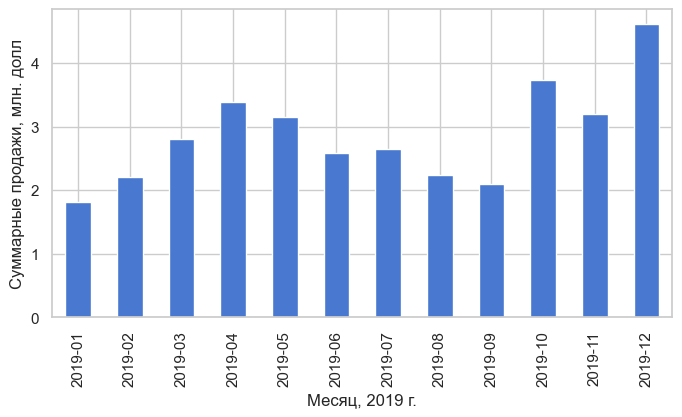

In [131]:
(df_gmv.groupby('month')['GMV'].sum() / 10**6)[:-1].plot(kind='bar')
plt.ylabel('Суммарные продажи, млн. долл', fontsize=12)
plt.xlabel('Месяц, 2019 г.');

In [137]:
df['hour'] = df['Order Date'].dt.hour

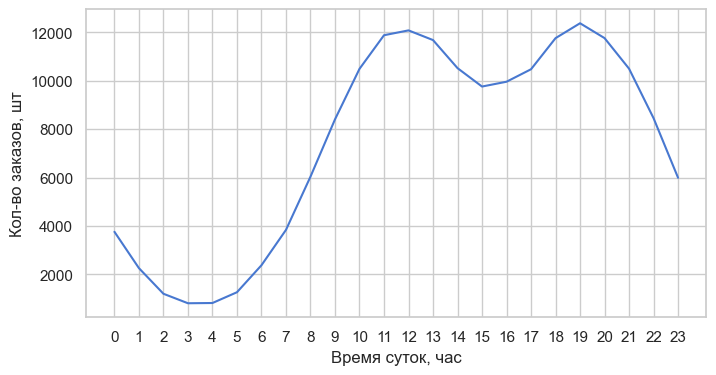

In [140]:
byhours = df.groupby('hour')['Order ID'].nunique()

byhours.plot()
plt.xticks(byhours.index)
plt.xlabel('Время суток, час', fontsize=12)
plt.ylabel('Кол-во заказов, шт', fontsize=12);

### Кейс №2: Доверительный интервал для среднего чека


Мы уже знаем, что доверительный интервал для среднего можно построить из ЦПТ:

$$ 
\bar x \overset{asy}{\sim} N \left(\mu, \frac{\hat{\sigma}^2}{n}\right).
$$ 

$$
\bar x_n \pm z_{1 - \frac{\alpha}{2}} \cdot \frac{\hat \sigma}{\sqrt{n}}
$$

Давайте сделаем это

In [175]:
df_user_gmv = df.groupby(['User ID','Month'])['GMV'].sum().reset_index()
df_user_gmv

,User ID,Month,GMV
0,1,2019-01,123.93
1,1,2019-04,379.99
2,1,2019-05,11.99
3,3,2019-01,150.00
4,4,2019-01,2.99
...,...,...,...
161782,79997,2019-10,2.99
161783,79998,2019-08,149.99
161784,79999,2019-06,413.89
161785,79999,2019-07,416.88


In [179]:
df_check = df_user_gmv.groupby('Month')['GMV'].agg(['mean', 'std', 'count'])[:-1]
df_check

,mean,std,count
Month,,,
2019-01,207.837089,352.805785,8726
2019-02,205.931209,350.282264,10693
2019-03,211.792695,361.603450,13254
2019-04,215.485875,365.621336,15735
2019-05,218.855033,374.154666,14405
2019-06,214.174332,363.206610,12036
2019-07,209.293792,359.698248,12651
2019-08,209.645795,357.754020,10706
2019-09,200.646655,353.123958,10454


In [180]:
df_check['left'] = df_check['mean'] - 1.96*df_check['std']/np.sqrt(df_check['count'])
df_check['right'] = df_check['mean'] + 1.96*df_check['std']/np.sqrt(df_check['count'])

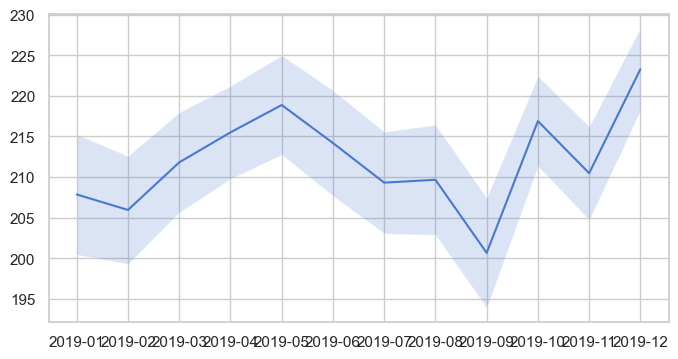

In [181]:
plt.plot(df_check['mean'])
plt.fill_between(df_check.index, df_check.left.values, df_check.right.values, alpha=0.2);